In [1]:
import warnings 
warnings.filterwarnings(action='ignore')
# OCR : 

# FFNN

- 이미지의 숫자 예측
- 0~9까지의 이미지화 인식 => 자동차 번호판

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
# target : 1 0 0 0 0 0 0 0 0 0 (변수가 10개)
mnist = input_data.read_data_sets("/tmp/data/", one_hot= True)
import tensorflow as tf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [29]:
# 128장의 이미지를 random 하게 공급
batch_x, batch_y = mnist.train.next_batch(128)
# batch_x: 이미지, batch_y: 타겟
print(batch_x.shape) # 128 * 784 (가로 28 x 세로 28) : flatten
learning_rate = 0.1 # hyper parameter
num_steps = 500 # epoch 세대
# 기울기 0
batch_size = 128 # mini batch 사이즈 : 속도를 고속, local 해를 구하기 위해서
display_step = 100

(128, 784)


In [30]:
# 히든 레이가 2개
# 784 (픽셀 1개를 변수) => 784x256 -> 256x256 -> 256x10
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
num_classes = 10 # target 0~9
# 미니배치 사이즈 128
X = tf.placeholder("float", [None, n_input]) # 128x784
Y = tf.placeholder("float", [None, num_classes])

In [31]:
# 설명력, (다차방정식)계수
weights = { # 784x256, 256x256, 256x10
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,num_classes]))
}

# activation
biases = { # 가중치 한덩어리당 bias기 반드시 존재
    'b1': tf.Variable(tf.random_normal([n_hidden_1])), # 변수 개수만큼
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [32]:
def neural_net(X) : # 128x784, 784x256
    # 128x256 전달 데이터 (tensor)
    layer_1 = tf.add(tf.matmul(X, weights['h1']), biases['b1'])
    # 128x256, 256x256 => 128x256
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # 128x256, 256x10 => 128x10
    out_layer=tf.matmul(layer_2, weights['out'])+biases['out']
    return out_layer

In [33]:
logits = neural_net(X) # 128x10
# 경사하강법 -> 미분가능 -> 분류
loss_op = tf.reduce_mean( # 원핫인코드된값 * log(확률값)
    # softmax : 확률값으로 계산
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
# 최적화기 : 기울기, 학습율을 어떻게 할 것인지
# adagrad : learnin-rate 처음에는 크게 -> 점점 작게 (0)
# adam = momentum + propgrad : adaptive 적응적 ( 상태를 봐가면서 적당히 )
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)
# 가장 큰값의 인덱스를 구함(one-hot-endcoding) => target
correct_pred = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
# cast : 데이터 행변환
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess: # GPU네트워크 연결 => 일반화
    sess.run(init)
    for step in range(1, num_steps + 1) : # epoch
        # 128x784, 128x10
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict = {X: batch_x, Y:batch_y})
            print("Step" + str(step) + ", Minibatch Loss= " +
                 "{:.4f}".format(loss) + ", Minibatch Loss= " +
                 "{:.3f}".format(acc))
            print("테스트 정확도: ", # 86%
                 sess.run(accuracy,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Step1, Minibatch Loss= 10235.6084, Minibatch Loss= 0.359
테스트 정확도:  0.2895
Step100, Minibatch Loss= 110.1805, Minibatch Loss= 0.898
테스트 정확도:  0.8552
Step200, Minibatch Loss= 119.8575, Minibatch Loss= 0.867
테스트 정확도:  0.8527
Step300, Minibatch Loss= 23.5603, Minibatch Loss= 0.906
테스트 정확도:  0.8635
Step400, Minibatch Loss= 54.5236, Minibatch Loss= 0.891
테스트 정확도:  0.873
Step500, Minibatch Loss= 50.6656, Minibatch Loss= 0.820
테스트 정확도:  0.8168


In [42]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import tensorflow as tf

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['const'] = np.ones(df.shape[0])
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,1.0


In [45]:
n, m = df.shape # 506, 14
X = tf.placeholder(tf.float64, shape=(n,m))
y = tf.placeholder(tf.float64, shape=(n,1))
XT = tf.transpose(X) # 14x506

In [47]:
print(n,m)

506 14


In [46]:
# 행렬식
# 거듭제곱 : 상관계수 506 (data point) x 14 (변수)
# 14x506, 506x14 => 14x14 상관행렬 =>
# 14x14 , 14x506(역행렬) => 14x506
# y값 : 14x506, 506x1 => 14x1
# 역행렬을 이용해서 가중치를 결정
# y = ax
# a = y/x # 변수간의 관계 => 역행렬
w = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)),XT),y)

y_pred = tf.matmul(X,w) # 506x14, 14x1 => 506x1 회귀식

with tf.Session() as sess :
    y_pred_ = sess.run(y_pred, feed_dict={X:df.values,
                                         y: boston.target.reshape(-1,1)})
print("예측한 집값 :", y_pred_[19], "실제 집값 :", boston.target[19])

예측한 집값 : [18.40613603] 실제 집값 : 18.2


In [48]:
import tensorflow as tf
sess = tf.Session()

val = [0,2,3]
val = tf.tile(val, [5])
print("홀일 때 ", sess.run(val))

홀일 때  [0 2 3 0 2 3 0 2 3 0 2 3 0 2 3]


In [49]:
# 타일은 차원을 확대하지는 않음
val = [[1,1,1],[2,2,2],[3,3,3]] # 3x3
val = tf.tile(val, [5,2]) # x5행 x2열 추가 => 15x6
print("2차원일때", sess.run(val))

2차원일때 [[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]


In [51]:
input_vecs = [[1.,2.],[2.,1.],[-2.,-1.]]
tiled_vecs = tf.tile(input_vecs, [1,3])
print(sess.run(tiled_vecs))
tiled_vecs = tf.tile(input_vecs, [2,3])
print(sess.run(tiled_vecs))

[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]
[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]
 [ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]


# 'kmeans : k 가 결정 => 중심이 발생'
- 각 데이터의 중심값을 빼서 거리값을 계산

In [55]:
# turnaround game
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import scale
from tensorflow.python.framework import ops

ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()
iris = datasets.load_iris() # 4개변수 = target

In [70]:
num_pts = len(iris.data) # 행수
num_feats = len(iris.data[0]) # columns 수
k = 3 # 군집수
generations = 25 # epoch
data_points = tf.Variable(iris.data)
# 레이블 변수
cluster_labels = tf.Variable(tf.zeros([num_pts], dtype=tf.int64))
# 중심데이터를 랜덤으로 취함
# 중심의 열변수개수 -> 4개
rand_starts = np.array([iris.data[np.random.choice(len(iris.data))] for _ in range(k)])
centroids = tf.Variable(rand_starts) # 중심
centroid_matrix= tf.reshape(tf.tile(centroids, [num_pts,1]), [num_pts, k, num_feats]) # ( 150,3,4 )
point_matrix = tf.reshape(tf.tile(data_points, [1,k]), [num_pts, k,num_feats]) # ( 150,3,4 )
distances = tf.reduce_sum(tf.square(point_matrix - centroid_matrix), axis=2) # axis=2 : 열중심
# 2개 전제( 인덱스, 실제값 비교 )
centroid_group = tf.argmin(distances,1) # 중심거리 1, 중심거리 2, 중심거리 3

In [71]:
# 그룹별로 거리의 평균
# 중심거리를 재계산해서 중심값을 재할당
def data_group_avg(group_ids, data):
    # 라벨번호로 값의 합계 : 라벨-값, 그룹이 3개
    sum_total = tf.unsorted_segment_sum(data, group_ids,3)
    # 그룹의 전체 개수
    num_total = tf.unsorted_segment_sum(tf.ones_like(data), group_ids, 3)
    avg_by_group = sum_total/num_total # 그룹의 평균거리
    return(avg_by_group)
means = data_group_avg(centroid_group, data_points)
# 업데이트 node를 결정
update = tf.group(centroids.assign(means), cluster_labels.assign(centroid_group))
init = tf.global_variables_initializer()
sess.run(init)

In [72]:
for i in range(generations) : # 25번 epoch
    print('Calculating gen{}, out of {}'.format(i, generations))
    # centroid_group : 그룹번호가 결정
    # update : 군집의 중심값을 재계산하고 그룹을 변경
    
    # 실행의 마지막 결과값 _
    _, centroid_group_count = sess.run([update, centroid_group])
    group_count = []
    for ix in range(k): # 군집별 카운트
        group_count.append(np.sum(centroid_group_count ==ix))
    print('Group counts: {}'.format(group_count))
# 결정된 중심값, 할당된 군집번
[centers, assignments] = sess.run([centroids, cluster_labels])

Calculating gen0, out of 25
Group counts: [32, 17, 101]
Calculating gen1, out of 25
Group counts: [48, 51, 51]
Calculating gen2, out of 25
Group counts: [44, 56, 50]
Calculating gen3, out of 25
Group counts: [41, 59, 50]
Calculating gen4, out of 25
Group counts: [39, 61, 50]
Calculating gen5, out of 25
Group counts: [39, 61, 50]
Calculating gen6, out of 25
Group counts: [39, 61, 50]
Calculating gen7, out of 25
Group counts: [39, 61, 50]
Calculating gen8, out of 25
Group counts: [39, 61, 50]
Calculating gen9, out of 25
Group counts: [39, 61, 50]
Calculating gen10, out of 25
Group counts: [39, 61, 50]
Calculating gen11, out of 25
Group counts: [39, 61, 50]
Calculating gen12, out of 25
Group counts: [39, 61, 50]
Calculating gen13, out of 25
Group counts: [39, 61, 50]
Calculating gen14, out of 25
Group counts: [39, 61, 50]
Calculating gen15, out of 25
Group counts: [39, 61, 50]
Calculating gen16, out of 25
Group counts: [39, 61, 50]
Calculating gen17, out of 25
Group counts: [39, 61, 50]
C

In [73]:
# set 키의 중복을 불허
def most_common(my_list): # 대표성을 띈 라벨을 결정
    return(max(set(my_list),key=my_list.count))
label0 = most_common(list(assignments[0:50])) # 라벨링
label1 = most_common(list(assignments[50:100]))
label2 = most_common(list(assignments[100:150]))

group0_count = np.sum(assignments[0:50]==label0)
group1_count = np.sum(assignments[50:100]==label1)
group2_count = np.sum(assignments[100:150]==label2)

accuracy = (group0_count + group1_count + group2_count)/150.
print('Accuracy: {:.2}'.format(accuracy)) # 89% kmeans로 군집화

Accuracy: 0.89


# 틱텍톡

In [74]:
import csv
import random
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [75]:
response = 6
catch_size = 50
symmetry = ['rotate180', 'rotate90', 'rotate270','flip_v','flip_h']

In [104]:
# 말판
def print_board(board): # 말판 출력
    symbols = ['0',' ', 'X'] # 유저, 컴퓨터
    board_plus1 = [int(x) + 1 for x in board]
    print(' ' + symbols[board_plus1[0]] + '|'
         + symbols[board_plus1[1]] + '|'
         + symbols[board_plus1[2]])
    print('________________')
    print(' ' + symbols[board_plus1[3]] + '|'
         + symbols[board_plus1[4]] + '|'
         + symbols[board_plus1[5]])
    print('________________')
    print(' ' + symbols[board_plus1[6]] + '|'
         + symbols[board_plus1[7]] + '|'
         + symbols[board_plus1[8]])

In [105]:
# 같은 상황을 해결하고 다양한 경우를 충족하기 위해 변화
def get_symmetry(board, response, transformation):
    # 컴퓨터가 위치를 잡기위해서
    if transformation == 'rotate180': # ex) 1번이 말을 놓을 자리 =>  7
        new_response = 8 - response
        return(board[::-1], new_response)
    elif transformation == 'rotate90':
        new_response = [6,3,0,7,4,1,8,5,2].index(response)
        tuple_board = list(zip(*[board[6:9], board[3:6],board[0:3]]))
        return([value for item in tuple_board for value in item], new_response)
    elif transformation == 'rotate270': 
        new_response = [2,5,8,1,4,7,0,3,6].index(response)
        tuple_board = list(zip(*[board[0:3], board[3:6],board[6:9]]))[::-1]
        return([value for item in tuple_board for value in item], new_response)
    elif transformation == 'flip_v': # vertical
        new_response = [6,7,8,3,4,5,0,1,2].index(response)
        return(board[6:9] + board[3:6] + board[0:3], new_response)
    elif transformation == 'flip_h': # horizontal
        new_response = [2,1,0,5,4,3,8,7,6].index(response)
        new_board = board[::-1]
        return(new_board[6:9] + new_board[3:6] + new_board[0:3], new_response)
    else :
        raise ValueError('해당하는 경우가 없음')

In [106]:
# 화일로 부터 말 규칙 로딩
def get_moves_from_csv(csv_file):
    moves = []
    with open(csv_file, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            # 0 0 0 -1 1 0 0 0 0 말위치
            moves.append(([int(x) for x in row[0:9]], int(row[9])))
    return(moves)

In [107]:
# 정해진 발규칙을 다양하게 변화하게 훈련용 데이터 확장
def get_rand_move(moves, n=1, rand_transforms = 2):
    (board, response) = random.choice(moves) # (현재말의 자리, 놓을 자리)
    possible_transforms = ['rotate90', 'rotate180', 'rotate270', 'flip_v', 'flip_h']
    for i in range(rand_transforms): # 경우의 수 확장
        random_transform = random.choice(possible_transforms)
        (board, response) = get_symmetry(board, response, random_transform)
        return(board, response)

In [108]:
moves = get_moves_from_csv('tictactoe_moves.csv')
train_length = 500
train_set = []
for t in range(train_length):
    train_set.append(get_rand_move(moves))

In [109]:
def init_weights(shape):
    return(tf.Variable(tf.random_normal(shape)))

In [110]:
def model(X, A1, A2, bias1, bias2):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, A1),bias1))
    layer2 = tf.add(tf.matmul(layer1, A2), bias2)
    return(layer2)

In [111]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 9]) # 50(batchsize)x9
Y = tf.placeholder(dtype=tf.int32, shape=[None]) # 50x1
A1 = init_weights([9,81]) # 50x81
bias1 = init_weights([81])
A2 = init_weights([81,9]) # 확률값 출력 => 50x9 # 확률값으로 나왔다는것
bias2 = init_weights([9])
model_output = model(X, A1, A2, bias1, bias2)

loss = tf.reduce_mean( # 분류 : 1~0 사이의 확률값
    tf.nn.sparse_softmax_cross_entropy_with_logits( # 확률
    logits=model_output, labels=Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output, 1) # 가장 큰 값을 가진 인덱스
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [112]:
loss_vec = []
for i in range(10000):
    # 50개를 임의적으로 선택
    rand_indices =np.random.choice(range(len(train_set)),batch_size,replace=False)
    batch_data = [train_set[i] for i in rand_indices]
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    sess.run(train_step, feed_dict={X:x_input, Y:y_target})
    temp_loss = sess.run(loss, feed_dict = {X:x_input, Y:y_target})
    loss_vec.append(temp_loss)
    if i%500==0:
        print('iteration' + str(i) + 'Loss:' + str(temp_loss))

iteration0Loss:11.239328
iteration500Loss:1.6943183
iteration1000Loss:1.4318614
iteration1500Loss:1.4128172
iteration2000Loss:1.1335921
iteration2500Loss:1.0867991
iteration3000Loss:1.1255729
iteration3500Loss:0.97626007
iteration4000Loss:0.96591425
iteration4500Loss:0.89230764
iteration5000Loss:0.87072295
iteration5500Loss:0.8620704
iteration6000Loss:0.80217636
iteration6500Loss:0.73190093
iteration7000Loss:0.7289745
iteration7500Loss:0.690606
iteration8000Loss:0.6980494
iteration8500Loss:0.68317175
iteration9000Loss:0.71024585
iteration9500Loss:0.65884393


In [113]:
test_board = [-1,0,0,1,-1,-1,0,0,1]
train_set = [x for x in train_set if x[0] != test_board]

In [114]:
# 게임 승패 결정
def check(board):
    wins = [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8],[0,4,8],[2,4,6]]
    for i in range(len(wins)):
        if board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]== 1:
            return(1)
        elif board[wins[i][0]] == board[wins[i][1]]==board[wins[i][2]] ==-1:
            return(-1)
    return(0)

In [116]:
game_tracker = [0.,0.,0.,0.,0.,0.,0.,0.,0.]
win_logical = False
num_moves = 0
# 게임은 무한루프
while not win_logical :
    player_index = input('이동하고 싶은 인덱스를 입력하시오. (0-8): ')
    num_moves += 1
    game_tracker[int(player_index)] = 1.

    [potential_moves] = sess.run(model_output, feed_dict={X: [game_tracker]})
    # 말 여부에 따라
    allowed_moves = [ix for ix, x in enumerate(game_tracker) if x==0.0]
    # 허락위치에 있는 것인지 확인
    # 큰 확률값 선택
    model_move = np.argmax([x if ix in allowed_moves else -999.0 for ix, x in enumerate(potential_moves)])
    # 컴퓨터가 선택
    game_tracker[int(model_move)] = -1.
    print('모델이 이동하였습니다.')
    print_board(game_tracker) # GUI 방식
    if check(game_tracker) == 1 or num_moves>=20:
        print('게임 종료! 승리하셨습니다. ')
        win_logical = True # True는 한번만, False는 무한
    elif check(game_tracker) == -1:
        print('게임 종료! 게임에 지셨습니다. !')
        win_logical = True

이동하고 싶은 인덱스를 입력하시오. (0-8): 8
모델이 이동하였습니다.
  | |0
________________
  | | 
________________
  | |X
이동하고 싶은 인덱스를 입력하시오. (0-8): 6
모델이 이동하였습니다.
  | |0
________________
  | | 
________________
 X|0|X
이동하고 싶은 인덱스를 입력하시오. (0-8): 4
모델이 이동하였습니다.
  |0|0
________________
  |X| 
________________
 X|0|X
이동하고 싶은 인덱스를 입력하시오. (0-8): 5
모델이 이동하였습니다.
 0|0|0
________________
  |X|X
________________
 X|0|X
게임 종료! 게임에 지셨습니다. !


# CNN

In [196]:
import os
def save_fig(fig_id, tight_layout=True):

    path = os.path.join("./images/", fig_id + ".png")
    print("Saving figure", fig_id)
    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300) # dot per inch


In [197]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [198]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
# 70(높이:행), 120(가로:열)
image = china[150:220, 130:250] # clipping
height, width, channels = image.shape
# 0~255
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

In [199]:
def plot_image(image): # 흑백
    plt.imshow(image, cmap="gray", interpolation="nearest") # 보간법
    plt.axis("off") # 이미지 축생략
def plot_color_image(image): # 컬러
    plt.imshow(image.astype(np.unit8), interpolation="nearest")
    plt.axis("off")

In [200]:
# 필터 
# - 필터 높이, 필터 가로, 입력 채널, 출력 채널
# 필터 2개가 필요
import numpy as np
fmap = np.zeros(shape=(7,7,1,2),dtype=np.float32)
fmap[:,3,0,0]=1 # 0 ,1,2,3,4,5,6 => 중앙(중앙에 있는 열)을 1로 # 0: 검은색, 1: 흰색
fmap[3,:,0,1]=1 # 0 => 행을 1로
fmap[:,:,0,0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

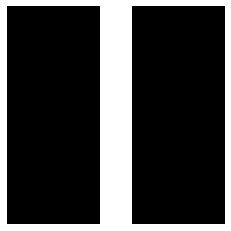

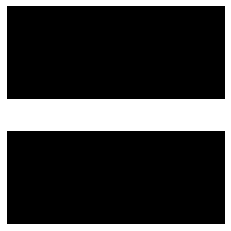

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [201]:
plot_image(fmap[:,:,0,0]) # 세로 흰색
plt.show()
plot_image(fmap[:,:,0,1]) # 가로 흰색
plt.show()
print(fmap[:,:,0,0])

In [202]:
reset_graph()
# 장수, 높이, 가로, 채널수
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap) # 필터를 상수로
# convolution은 1d(text), 2d(image), 3d(동영상)
# 패딩 : SAME,
# convolution, filter, padding, strides
# 70x120 => 70x120 same
# 패딩을 하지 않았다면 64x114 =>

convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1],
                          padding="SAME", use_cudnn_on_gpu=False) 
# pooling만 별도로 진행

In [203]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

Saving figure china_original


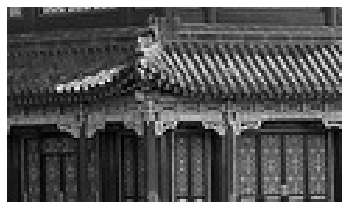

In [204]:
plot_image(images[0,:,:,0])
save_fig("china_original", tight_layout=False)
plt.show()

Saving figure china_vertical


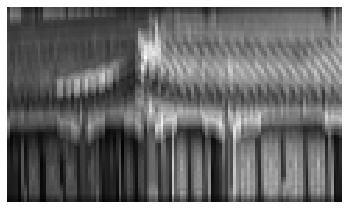

In [205]:
# 2장의 이미지:
plot_image(output[0,:,:,0]) # 0번 필터 적용 : 세로줄
save_fig("china_vertical", tight_layout=False)
plt.show()

Saving figure china_horizontal


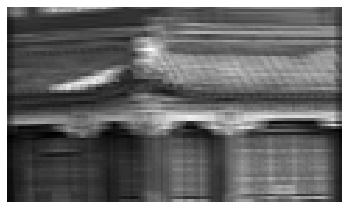

In [206]:
plot_image(output[0,:,:,1])
save_fig("china_horizontal", tight_layout = False)
plt.show()